# Laboratory #05 : Corner detection and ORB

At the end of this laboratory, you would get familiarized with

*   Corner Detection using FAST and Harris Corners
*   ORB feature detectors and descriptors

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

# **Students** (First Name and Last Name)

1. Marc Gonzalez Vidal
2. Oriol Miró Lopez-Feliu

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Marc
base_path = '/content/drive/MyDrive/images/'

In [2]:
# Oriol
base_path = '/content/drive/MyDrive/MAI_CV_LAB/labs_4_5/images/'

In [3]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
import os
from skimage import color, data, feature, filters, io, transform

# Corner Detection

### Exercise: #1

*    Detect the corners in the image starbucks4.jpg. Use corner_fast to extract FAST corners for the given image and corner_peaks to find corners in the corner measure response image.
*   Show the original image, fast corners, peaks overlayed on the original image using matplotlib subplot.



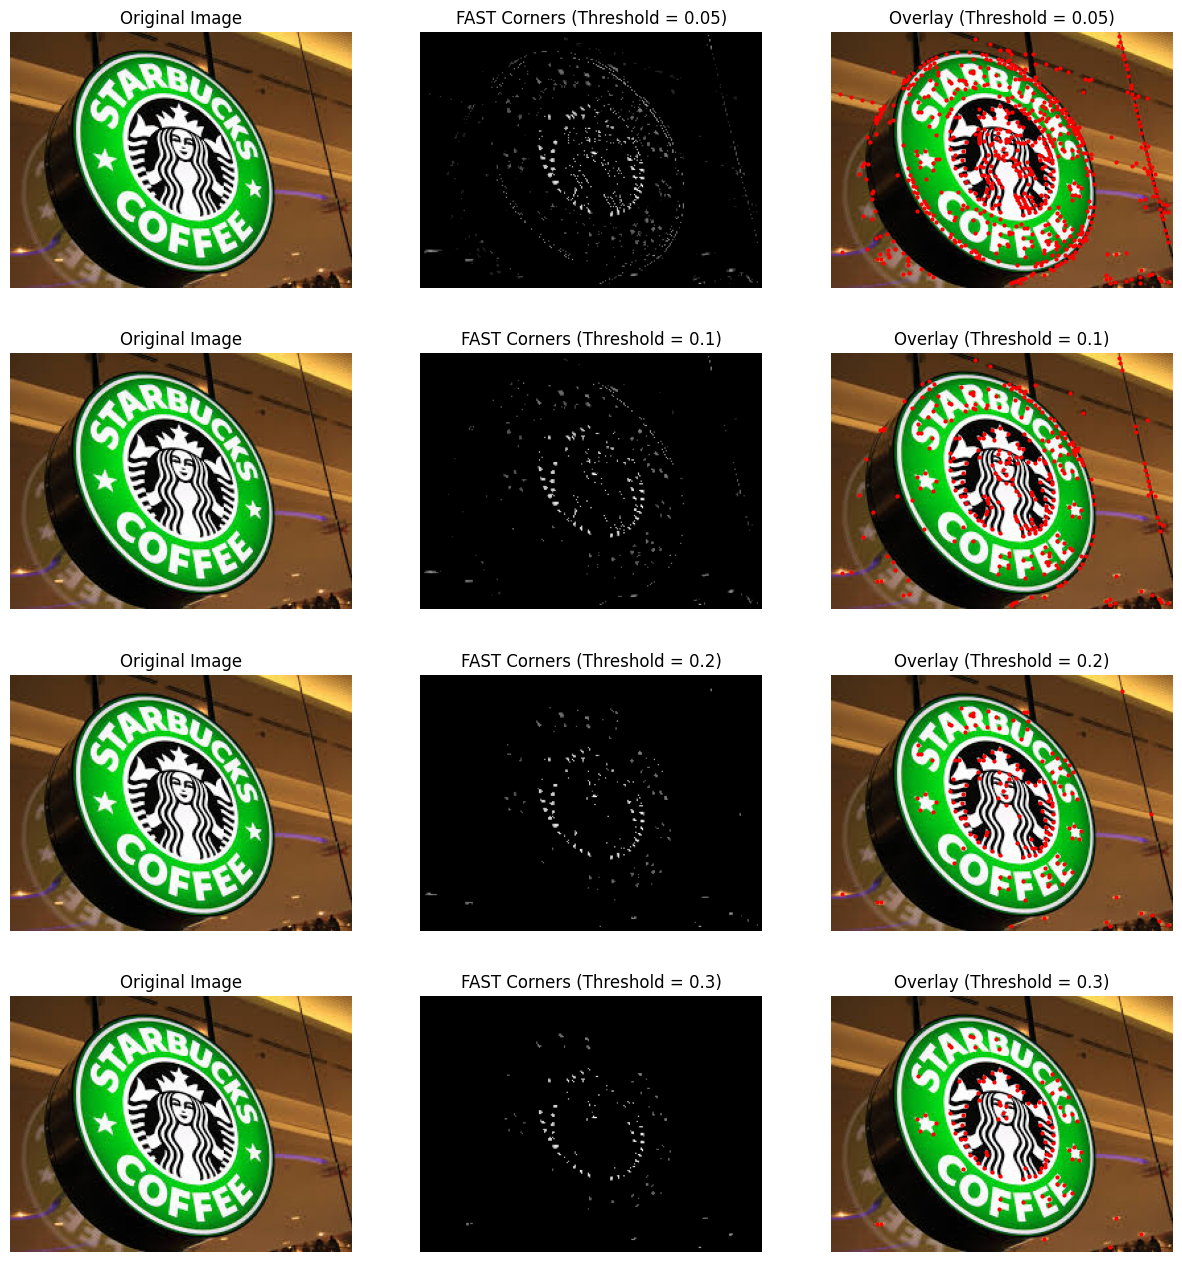

In [ ]:
# solution

# NOTE: We do it like this so we can answer the question on thresholds later on!


img       = io.imread(base_path + "starbucks/starbucks4.jpg")
img_gray  = color.rgb2gray(img)

thresholds = [0.05, 0.1, 0.2, 0.3]

# base fig (show original in all as question statement asks for original, fast, and overlay)
fig, axes = plt.subplots(len(thresholds), 3, figsize=(15, len(thresholds) * 4))

for idx, thresh in enumerate(thresholds):

    fast_corners  = feature.corner_fast(img_gray, threshold=thresh)
    coords        = feature.corner_peaks(fast_corners, min_distance=1)

    # original
    axes[idx, 0].imshow(img)
    axes[idx, 0].set_title("Original Image")
    axes[idx, 0].axis("off")

    # FAST corners
    axes[idx, 1].imshow(fast_corners, cmap='gray')
    axes[idx, 1].set_title(f"FAST Corners (Threshold = {thresh})")
    axes[idx, 1].axis("off")

    # overlay
    axes[idx, 2].imshow(img)
    axes[idx, 2].plot(coords[:, 1], coords[:, 0], 'ro', markersize=2)
    axes[idx, 2].set_title(f"Overlay (Threshold = {thresh})")
    axes[idx, 2].axis("off")

plt.show()

*   Analyze and discuss the effect of changing **'threshold'** in the corner_fast function.

**Solution**

As the threshold in the `corner_fast` function increases, the sensitivity to intensity variations decreases, leading to fewer corners being detected. When using low thresholds (e.g., 0.05), many corners are identified, including noise and even lines; moderate thresholds (e.g., 0.1) filter out irrelevant corners, retaining more significant features; high thresholds (e.g., 0.2 and 0.3) detect only the most prominent corners, reducing noise but potentially missing subtle features.

*   Repeat the exercise by replacing FAST corners with Harris corners.

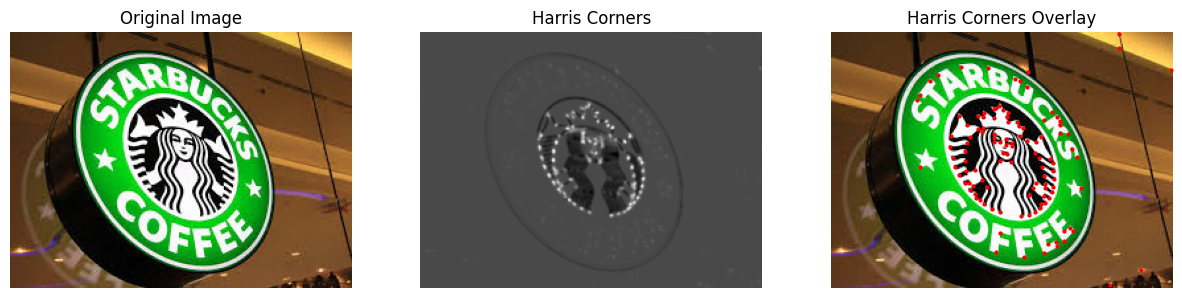

In [ ]:
# solution

# Note: we will now not compute many thresholds, but rather an intermediate one.

harris_corners  = feature.corner_harris(img_gray)
coords          = feature.corner_peaks(harris_corners, min_distance=1, threshold_rel=0.05)


# visualise

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# original
axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis("off")

# harris corners
axes[1].imshow(harris_corners, cmap='gray')
axes[1].set_title("Harris Corners")
axes[1].axis("off")

# overlay
axes[2].imshow(img)
axes[2].plot(coords[:, 1], coords[:, 0], 'ro', markersize=2)
axes[2].set_title("Harris Corners Overlay")
axes[2].axis("off")

plt.show()

*   Do you find difference between both the techniques? If so, why and what difference do you observe?

**Solution**

Yes, we observe notable differences between FAST and Harris. We observe that FAST detects a greater number of corners, including weaker ones; this is because it is a non-parametric method that evaluates pixel intensity differences within a local circular neighborhood, making it faster but more prone to noise. On the other hand, Harris seems to find much fewer corners (e.g. at threshold 0.05); it computes intensity gradients in multiple directions, and it finds points of high variation where gradients change significantly. Harris is more robust to noise altough slower.

# ORB feature detector and binary descriptor

### Exercise #0: Compute ORB descriptors and find descriptors match

*   Load 'astronaut' image from data module.
*   Convert the image to grayscale.
*   Create a copy of the image and rotate it by 180&deg;



In [4]:
img1 = color.rgb2gray(data.astronaut())
img2 = transform.rotate(img1, 180)

*   Create an ORB feature detector with default parameters. *Hint: ORB feature detector is available in skimage.feature module.*



In [5]:
descriptor_extractor = feature.ORB(n_keypoints=200)

*   Extract the keypoints and descriptors using detect_and_extract function for both the images

In [6]:
descriptor_extractor.detect_and_extract(img1)
keypoints1    = descriptor_extractor.keypoints
descriptors1  = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2    = descriptor_extractor.keypoints
descriptors2  = descriptor_extractor.descriptors

*   Descriptors can be matched using match_descriptors function available in skimage.feature module
*   The matches can be plotted using the plot_matches function available in skimage.feature module

<ipython-input-7-981b87635042>:2: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  feature.plot_matches(plt, img1, img2, keypoints1, keypoints2, matches12)


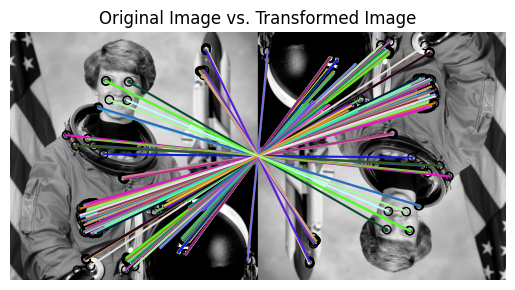

In [7]:
matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)
feature.plot_matches(plt, img1, img2, keypoints1, keypoints2, matches12)
plt.axis('off')
plt.title("Original Image vs. Transformed Image")
plt.show()

### Exercise: #1

*   Analyze and discuss the effect of changing the parameter **'max_ratio'** in the match_descriptors function.

**Solution**

`max_ratio` sets the maximum allowable ratio between the distances of the closest and second-closest descriptor matches, filtering out ambiguous matches. Lowering the value (e.g., 0.5) enforces stricter matching, improving accuracy by only accepting high-quality matches. Increasing it (e.g., 0.9) allows more matches but includes less distinct ones, potentially introducing false positives. [Citation](https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.match_descriptors).






*   What do you infer from **'harris_k'**, **'n_scales'**, **'fast_n'**, **'fast_threshold'** parameters in ORB function?

**Solution**

- `harris_k`: Controls the sensitivity in the Harris corner detection step. Lower values (e.g. in the range [0, 0.2]) make the algorithm more sensitive to sharp corners.

- `n_scales`: Specifies the number of scales in the image pyramid. Higher values increase scale invariance.

- `fast_n`: Defines the minimum number of consecutive pixels (out of 16) in the FAST algorithm that need to be either brighter or darker relative to the test pixel. Increasing this value makes corner detection stricter, allowing fewer but more distinct corners.

- `fast_threshold`: The intensity threshold used in the FAST algorithm. A lower threshold detects more corners by relaxing the intensity difference requirement, while a higher threshold restricts detection to strong corners with significant intensity contrast.

[Citation](https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.ORB).

### Exercise: #2
*   Using the above example, create a function get_ORB, that takes two images as parameters and returns the keypoints of both images and descriptor matches

In [8]:
# solution

def get_ORB(img1, img2, n_keypoints=200):

    # if not gray, make gray
    if img1.ndim == 3:
        img1 = color.rgb2gray(img1)
    if img2.ndim == 3:
        img2 = color.rgb2gray(img2)

    # init orb
    descriptor_extractor = feature.ORB(n_keypoints=n_keypoints)

    # detect & extract first image
    descriptor_extractor.detect_and_extract(img1)
    keypoints1 = descriptor_extractor.keypoints
    descriptors1 = descriptor_extractor.descriptors

    # detect & extract second image
    descriptor_extractor.detect_and_extract(img2)
    keypoints2 = descriptor_extractor.keypoints
    descriptors2 = descriptor_extractor.descriptors

    # match
    matches = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)

    return keypoints1, keypoints2, matches

*   Using the above function, detect the correspondences between the model image 'starbucks.jpg' with the scene image 'starbucks4.jpg'
*   Plot the matches between the two images.

<ipython-input-9-a4583ccbc1ef>:13: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  feature.plot_matches(ax, model, scene, keypoints1, keypoints2, matches)


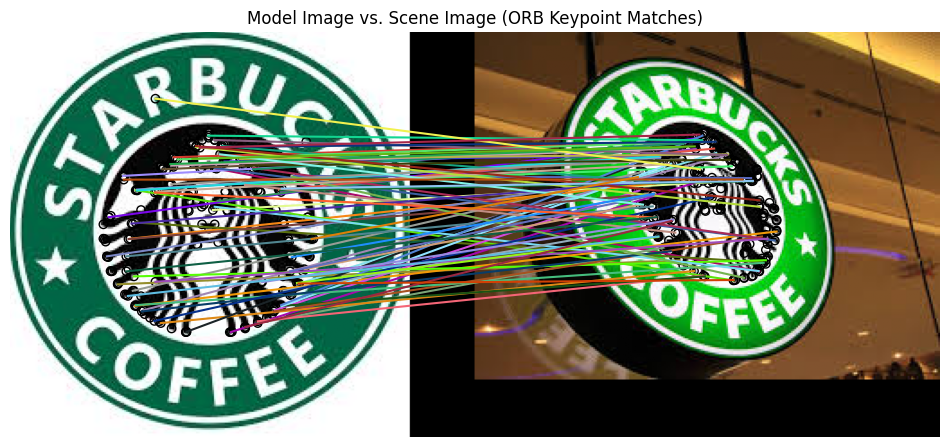

In [9]:
# solution

model = io.imread(base_path + "starbucks/starbucks.jpg")
scene = io.imread(base_path + "starbucks/starbucks4.jpg")

# our function
keypoints1, keypoints2, matches = get_ORB(model, scene)


# visualise

fig, ax = plt.subplots(figsize=(12, 6))
feature.plot_matches(ax, model, scene, keypoints1, keypoints2, matches)
plt.axis('off')
plt.title("Model Image vs. Scene Image (ORB Keypoint Matches)")
plt.show()


### Exercise: #3

*   Using "starbucks.jpg" image as a model, show its matches to all Starbucks images.
*   Show the number of the matches for the pair as title for each plot.

<ipython-input-10-092f1c79c24b>:22: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  feature.plot_matches(plt, starbucks_logo, starbucks_image, keypoints_logo, keypoints_image, matches)


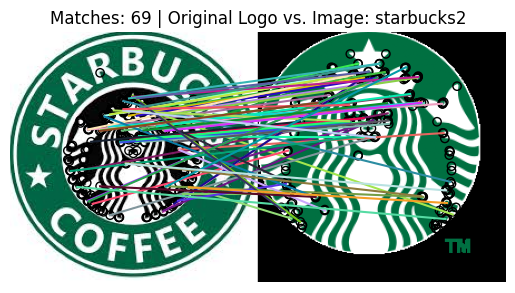

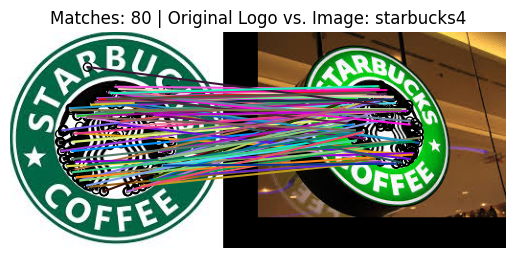

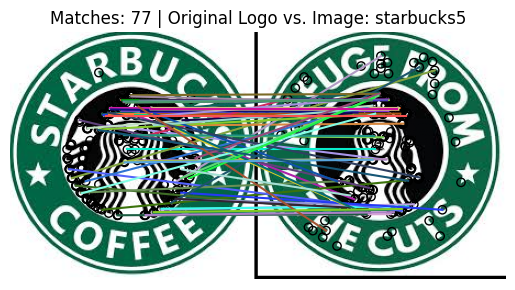

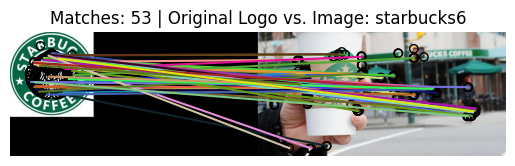

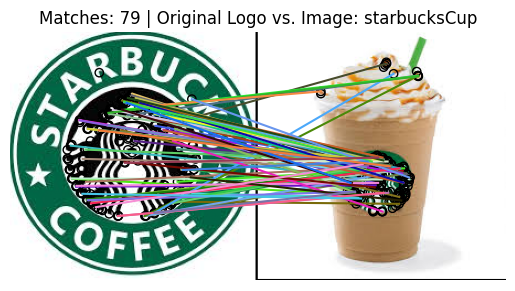

In [10]:
# solution

starbucks_logo = io.imread(base_path + "starbucks/" + "starbucks.jpg")

starbucks_ext = ["2", "4", "5", "6", "Cup"]

for extension in starbucks_ext:

  jpg_path = base_path + f"starbucks/starbucks{extension}.jpg"
  png_path = base_path + f"starbucks/starbucks{extension}.png"

  # Check if .jpg or .png file exists
  if os.path.exists(jpg_path):
    starbucks_image = io.imread(jpg_path)
  elif os.path.exists(png_path):
    starbucks_image = io.imread(png_path)[:,:,:3]

  keypoints_logo, keypoints_image, matches = get_ORB(starbucks_logo, starbucks_image)

  num_matches = matches.shape[0]

  feature.plot_matches(plt, starbucks_logo, starbucks_image, keypoints_logo, keypoints_image, matches)

  plt.axis('off')
  plt.title(f"Matches: {num_matches} | Original Logo vs. Image: starbucks{extension}")
  plt.show()

*   Comment on the performance of the algorithm with respect to each image. When do you think the algorithm works better?

**Solution**

In general, the algorithm works quite well for all images. It is true that there are cases where it works better than others, such as image 2 compared to image 4. We believe that the algorithm works better when the model to be found is exactly the same in both images, that is, if we look closely, many of the images have variations with respect to the logo, such as the third one where the letters change or the fourth one where there are no letters, because if this is the case, the algorithm may find other key points to match with the key points of the logo that do not actually exist in the image we are looking at.

### Exercise: #4

*   Repeate **Exercise #2**, by changing the orientation of the model image by rotating it and comparing it with its original version.
*   Create 8 orientations of the model image by rotating the image by 45&deg; (0, 45, 90, 135, 180, 225, 270, 315). *Hint: You can use the rotate() function from skimage.transform.*

In [11]:
# solution

model = io.imread(base_path + "starbucks/starbucks.jpg")
scene = io.imread(base_path + "starbucks/starbucks4.jpg")

degrees = [0, 45, 90, 135, 180, 225, 270, 315]

for degree in degrees:
  model_rotated = transform.rotate(model, degree)
  keypoints1, keypoints2, matches = get_ORB(model_rotated, scene)


  # visualise

  fig, ax = plt.subplots(figsize=(12, 6))
  feature.plot_matches(ax, model_rotated, scene, keypoints1, keypoints2, matches)
  plt.axis('off')
  plt.title("Model Image vs. Scene Image (ORB Keypoint Matches)")
  plt.show()


Output hidden; open in https://colab.research.google.com to view.

*   What do you observe with respect to the change in orientations?

**Solution**

We observe that this algorithm is robust to orientation changes. Although it can sometimes be confused, and some of the matches may not be true matches, it generally performs well under these circumstances.

### Exercise: #5

*   Repeat **Exercise #3** using Coco-cola images using cocacola_logo.png as the model image.
*   Does the same parameters used for Starbucks images work in this case? Or was it necessary to modify the ORB parameters?

<ipython-input-12-e5beee436dca>:22: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  feature.plot_matches(plt, cocacola_logo, cocacola_image, keypoints_logo, keypoints_image, matches)


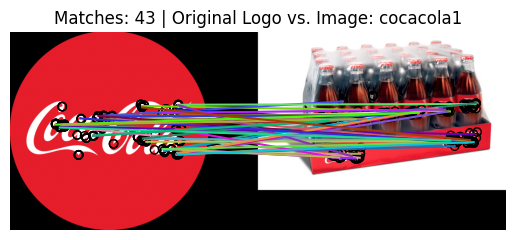

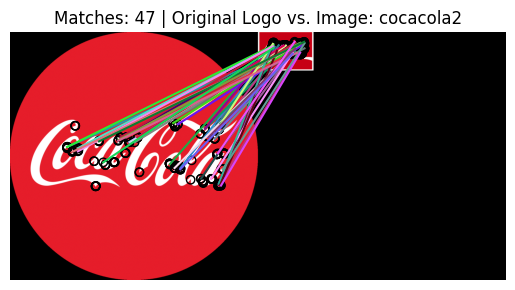

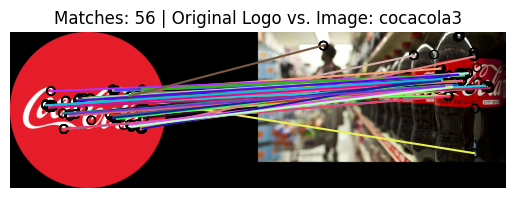

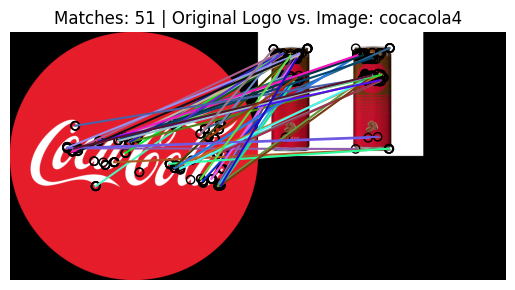

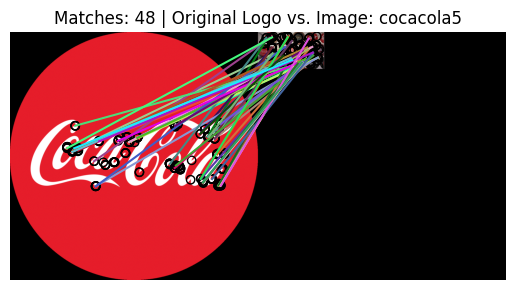

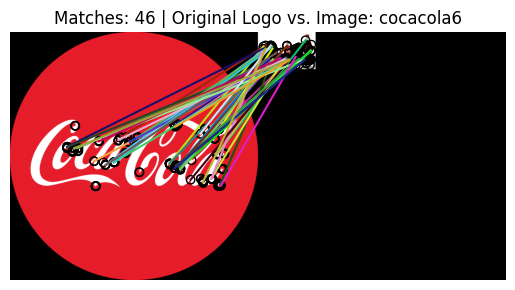

In [12]:
# solution

cocacola_logo = io.imread(base_path + "cocacola/" + "cocacola_logo.png")[:,:,:3]

cocacola_ext = ["1", "2", "3", "4", "5", "6"]

for extension in cocacola_ext:

  jpg_path = base_path + f"cocacola/cocacola{extension}.jpg"
  png_path = base_path + f"cocacola/cocacola{extension}.png"

  # Check if .jpg or .png file exists
  if os.path.exists(jpg_path):
    cocacola_image = io.imread(jpg_path)[:,:,:3]
  elif os.path.exists(png_path):
    cocacola_image = io.imread(png_path)[:,:,:3]

  keypoints_logo, keypoints_image, matches = get_ORB(cocacola_logo, cocacola_image)

  num_matches = matches.shape[0]

  feature.plot_matches(plt, cocacola_logo, cocacola_image, keypoints_logo, keypoints_image, matches)

  plt.axis('off')
  plt.title(f"Matches: {num_matches} | Original Logo vs. Image: cocacola{extension}")
  plt.show()


**Solution**

It was not necessary to change the parameters to obtain satisfiable results.

### Exercise #6. Analysis of the applied techniques and results

*   What are the advantages of ORB object detection compared with HOG object detector?

**Solution**

ORB is computationally efficient making it faster compared to HOG. It is inherently rotation-invariant, allowing it to detect objects regardless of orientation, while HOG requires preprocessing for rotation. Moreover, it effectively handles different object scales without resizing, which is not the case for HOG. It uses binary descriptors for fast matching, whereas HOG requires more complex calculations, and also consume less memory than HOG dense histograms. Additionaly it usually works better in noisy environments due to the use of binary descriptors.

*   What would happen if you analyse an image that does not contain the Starbucks logo (as is the case of "edificio.jpg")?

<ipython-input-28-0e98f351b881>:17: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  feature.plot_matches(plt, starbucks_logo_color, edificio_color, keypoints1, keypoints2, matches12)


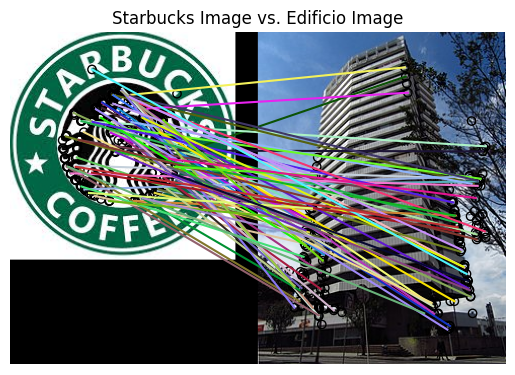

In [ ]:
# solution

starbucks_logo_color = io.imread(base_path + "/starbucks/" + "starbucks.jpg")
starbucks_logo = color.rgb2gray(starbucks_logo_color)
edificio_color = io.imread(base_path + "edificio.jpg")
edificio = color.rgb2gray(edificio_color)

descriptor_extractor.detect_and_extract(starbucks_logo)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(edificio)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)
feature.plot_matches(plt, starbucks_logo_color, edificio_color, keypoints1, keypoints2, matches12)
plt.axis('off')
plt.title("Starbucks Image vs. Edificio Image")
plt.show()

**Solution**

The algorithm will find keypoints for both images, but since the content of one image (in this case Starbucks) is not contained in the other, it is likely that false positives will be detected for keypoints that look similar. If the image were contained within, these points would surely not be detected as matches because there would be other points with greater similarity, but since this is not the case, they are matched and are false positives.

# Panorama Stitching (Not graded)

Image Mosaicing is a technique of combining multiple overlapping images into a single image.

*   A simple tutorial can be found in this notebook:
*   https://github.com/scikit-image/skimage-tutorials/blob/main/lectures/solutions/adv3_panorama-stitching-solution.ipynb


---

# **End of P5: Corner Detection and ORB**

This notebook is part of **Deliverable 2**

Deadline for Deliverable 2 (P4 and P5) submission in CampusVirtual is: **Monday, the 28th of October, 2024**
